In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import neighbors
from sklearn import svm

In [35]:
df = pd.read_csv("E:\\python\\Day24\\train.csv")
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
df = df.drop(['Name', 'Ticket', 'Cabin','PassengerId'],axis=1)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [37]:
le = preprocessing.LabelEncoder()


In [38]:
le.fit(df.Sex)

LabelEncoder()

In [39]:
print(le.classes_)

['female' 'male']


In [40]:
df.Sex = le.transform(df.Sex)
df.Sex

0      1
1      0
2      0
3      0
4      1
      ..
884    1
885    0
886    0
887    1
888    1
Name: Sex, Length: 889, dtype: int32

In [41]:
le.fit(df["Embarked"])
print(le.classes_)
df["Embarked"] = le.transform(df["Embarked"])
df["Embarked"]

['C' 'Q' 'S']


0      2
1      0
2      2
3      2
4      2
      ..
884    2
885    2
886    2
887    0
888    1
Name: Embarked, Length: 889, dtype: int32

In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [43]:
y = df.Pclass
y

0      3
1      1
2      3
3      1
4      3
      ..
884    2
885    1
886    3
887    1
888    3
Name: Pclass, Length: 889, dtype: int64

In [52]:
X = df.drop(["Pclass"],axis=1)
X

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,1,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,0,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
884,0,1,27.0,0,0,13.0000,2
885,1,0,19.0,0,0,30.0000,2
886,0,0,45.0,1,2,23.4500,2
887,1,1,26.0,0,0,30.0000,0


In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [69]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3) #n_neighbors random value
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [70]:
knn.fit(X_train,y_train).score(X_test,y_test)

0.8651685393258427

In [71]:
neighbors.KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train).score(X_test,y_test)

0.8651685393258427

In [99]:
y_pred = knn.predict(X_test)
y_pred.sum()

617

In [73]:
confusion_matrix(y_test,y_pred)

array([[ 63,   5,   2],
       [  7,  28,  14],
       [  3,   5, 140]], dtype=int64)

In [74]:
accuracy_score(y_test,y_pred)

0.8651685393258427

In [113]:
def kNeNa(dv,n):
    
    for i in dv:
        y = df[i]
        print("\nThe dependant Varible is: ", i)
        X = df.drop([i],axis = 1)
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
        k=[]
        s=[]
        for j in range(1,n):
            kNN=neighbors.KNeighborsClassifier(n_neighbors=j)
            k.append(j)
            model = kNN.fit(X_train,y_train)
            score_ = model.score(X_test,y_test)
            s.append(score_)
            y_pred = knn.predict(X_test)
            print(f"\n\nThe score for kNN value for {j}\n",score_)
            print(f"\n\nConfusion Matrix for {i}\n", confusion_matrix(y_test,y_pred))
            
            #neighbors.KNeighborsClassifier(n_neighbors=j).fit(X_train,y_train)
            
        plt.plot(k,s)
        plt.xlabel=("k value")
        plt.ylabel=("score")
        plt.title=("graph between k value and accuracy score of knn")
        plt.show()
        
        print("\n**********************************************************")
            
        
        


The dependant Varible is:  Pclass


The score for kNN value for 1
 0.8913857677902621


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 2
 0.8651685393258427


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 3
 0.8651685393258427


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 4
 0.8239700374531835


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 5
 0.8314606741573034


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 6
 0.846441947565543


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 7
 0.8426966292134831


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 8
 0.850187265917603


Confusion 



The score for kNN value for 66
 0.7565543071161048


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 67
 0.7602996254681648


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 68
 0.7602996254681648


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 69
 0.7640449438202247


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 70
 0.7640449438202247


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 71
 0.7640449438202247


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 72
 0.7565543071161048


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 73
 0.7640449438202247


Confusion Matrix for Pclass
 [[ 63 



The score for kNN value for 129
 0.7528089887640449


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 130
 0.7602996254681648


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 131
 0.7602996254681648


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 132
 0.7602996254681648


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 133
 0.7602996254681648


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 134
 0.7565543071161048


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 135
 0.7602996254681648


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 136
 0.7602996254681648


Confusion Matrix for Pclass



The score for kNN value for 194
 0.7303370786516854


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 195
 0.7228464419475655


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 196
 0.7228464419475655


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 197
 0.7228464419475655


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 198
 0.7228464419475655


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 199
 0.7191011235955056


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 200
 0.7191011235955056


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 201
 0.7228464419475655


Confusion Matrix for Pclass



Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 260
 0.7191011235955056


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 261
 0.7191011235955056


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 262
 0.7191011235955056


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 263
 0.7191011235955056


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 264
 0.7191011235955056


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 265
 0.7191011235955056


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The score for kNN value for 266
 0.7153558052434457


Confusion Matrix for Pclass
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]


The 

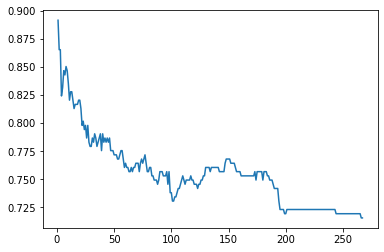


**********************************************************

The dependant Varible is:  Sex


The score for kNN value for 1
 0.6928838951310862


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 2
 0.6179775280898876


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 3
 0.6554307116104869


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 4
 0.6479400749063671


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 5
 0.6928838951310862


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 6
 0.651685393258427


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0 



The score for kNN value for 56
 0.6329588014981273


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 57
 0.6329588014981273


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 58
 0.6329588014981273


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 59
 0.6217228464419475


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 60
 0.6292134831460674


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 61
 0.6254681647940075


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 62
 0.6254681647940075



The score for kNN value for 111
 0.651685393258427


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 112
 0.6591760299625468


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 113
 0.6554307116104869


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 114
 0.6554307116104869


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 115
 0.6479400749063671


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 116
 0.6554307116104869


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 117
 0.6516853932

 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 165
 0.6329588014981273


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 166
 0.6367041198501873


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 167
 0.6329588014981273


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 168
 0.6329588014981273


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 169
 0.6292134831460674


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 170
 0.6329588014981273


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0  



Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 217
 0.6329588014981273


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 218
 0.6329588014981273


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 219
 0.6329588014981273


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 220
 0.6329588014981273


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 221
 0.6329588014981273


Confusion Matrix for Sex
 [[  0  32  13  53]
 [  0  41  25 103]
 [  0   0   0   0]
 [  0   0   0   0]]


The score for kNN value for 222
 0.6329588014981273


Confusion Matrix for Sex
 [[  0  32  13  53]

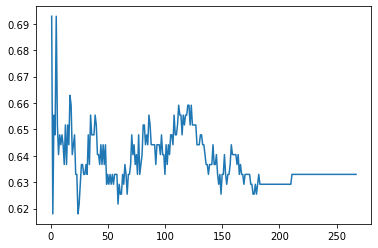


**********************************************************


In [114]:
dv = ['Pclass', 'Sex']
kNeNa(dv,268)

# Support Vector Machine

In [115]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [118]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [119]:
clf = svm.SVC(gamma=0.01,C=100)

In [124]:
clf.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [134]:
y_pred=clf.predict(X_test)
print(accuracy_score(y_test,y_pred,normalize=True),"\n")
print(confusion_matrix(y_test,y_pred),"\n")

0.9026217228464419 

[[ 64   4   2]
 [  4  36   9]
 [  1   6 141]] 



In [149]:
def sVM(dv):
    
    for i in dv:
        
        y = df[i]
        X = df.drop([i],axis = 1)
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
        clf = svm.SVC(gamma=0.01,C=100)
        y_pred = clf.fit(X_train,y_train).predict(X_test)
        print (f"The dependent variable is {i}\n")
        print("Accuracy Score:", accuracy_score(y_test,y_pred,normalize=True))
        print("\nConfusion Matrix\n",confusion_matrix(y_test,y_pred),"\n")
        print("\n**********************************************************")
       
            

In [150]:
dv = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
sVM(dv)

The dependent variable is Pclass

Accuracy Score: 0.9026217228464419

Confusion Matrix
 [[ 64   4   2]
 [  4  36   9]
 [  1   6 141]] 


**********************************************************
The dependent variable is Sex

Accuracy Score: 0.7265917602996255

Confusion Matrix
 [[ 66  32]
 [ 41 128]] 


**********************************************************
The dependent variable is SibSp

Accuracy Score: 0.7490636704119851

Confusion Matrix
 [[150  24   7   0   1   0   0]
 [ 21  39   5   0   0   0   0]
 [  4   1   3   0   0   0   0]
 [  0   2   1   3   1   0   0]
 [  0   0   0   0   2   0   0]
 [  0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   2]] 


**********************************************************
The dependent variable is Parch

Accuracy Score: 0.797752808988764

Confusion Matrix
 [[187   6   5   0   0   0]
 [ 21  15   3   0   0   1]
 [ 10   6  11   0   0   0]
 [  0   0   1   0   0   0]
 [  1   0   0   0   0   0]
 [  0   0   0   0   0   0]] 


***************